on the anaconda prompt do:

pip install "git+https://github.com/bblais/classy" --upgrade

In [1]:
from pylab import *
from classy import *

Version:  0.0.65


In [2]:
data=load_excel('data/iris.xls')

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


## Look at the data

In [3]:
data.vectors.shape

(150, 4)

In [5]:
data.targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
data.target_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [7]:
data.feature_names

array(['petal length in cm', 'petal width in cm', 'sepal length in cm',
       'sepal width in cm'], dtype=object)

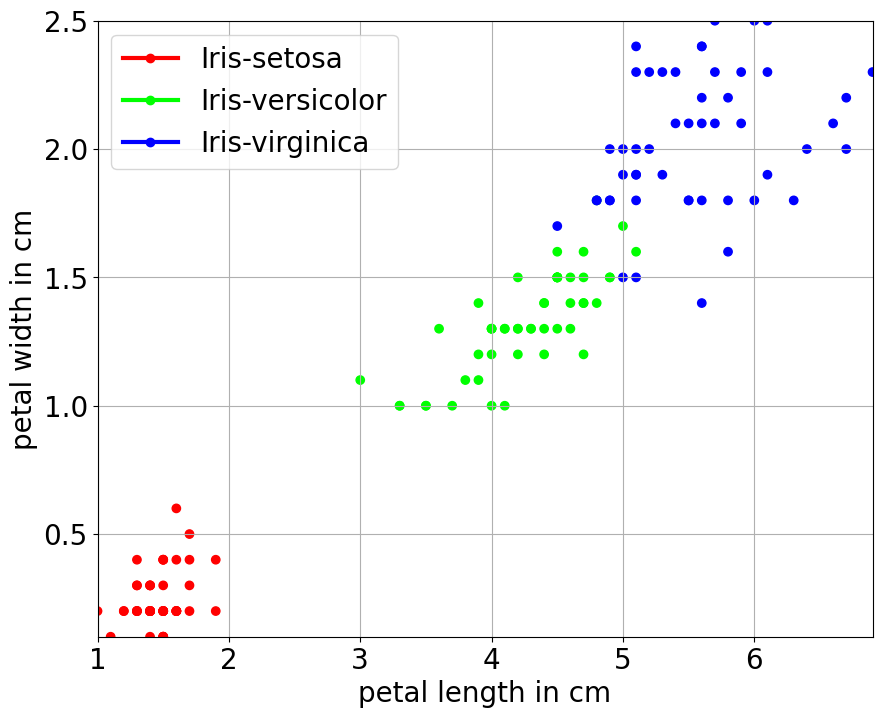

In [11]:
subset=extract_features(data,[0,1])
plot2D(subset)

## Classification

In [13]:
C=NaiveBayes()

In [14]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [23]:
%%time
C.fit(data_train.vectors,data_train.targets)

CPU times: user 697 μs, sys: 154 μs, total: 851 μs
Wall time: 717 μs


In [25]:
print("On training set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On test set:",C.percent_correct(data_test.vectors,data_test.targets))

On training set: 95.83333333333334
On test set: 100.0


In [26]:
C.means

array([[1.44634146, 0.24878049, 5.01463415, 3.4       ],
       [4.30487805, 1.33658537, 5.96585366, 2.8       ],
       [5.55      , 2.04210526, 6.59210526, 2.98157895]])

In [38]:
C.predict(array([ [1,2.2,1.2,4.4] ,[.5,.5,4,3] ] ))

array([2, 0])

In [39]:
C=kNearestNeighbor(k=3)

In [40]:
%%time
C.fit(data_train.vectors,data_train.targets)

CPU times: user 357 μs, sys: 145 μs, total: 502 μs
Wall time: 487 μs


In [41]:
print("On training set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On test set:",C.percent_correct(data_test.vectors,data_test.targets))

On training set: 95.0
On test set: 100.0


In [42]:
C.predict(array([ [1,2.2,1.2,4.4] ,[.5,.5,4,3] ] ))

array([0, 0])

In [43]:
C=CSC()

In [44]:
%%time
C.fit(data_train.vectors,data_train.targets)

CPU times: user 31.8 ms, sys: 2.71 ms, total: 34.5 ms
Wall time: 39.4 ms


In [45]:
print("On training set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On test set:",C.percent_correct(data_test.vectors,data_test.targets))

On training set: 100.0
On test set: 96.66666666666667


In [46]:
C.predict(array([ [1,2.2,1.2,4.4] ,[.5,.5,4,3] ] ))

array([0, 0])

In [47]:
C.centers

array([[5. , 1.5, 6. , 2.2],
       [4.9, 2. , 5.6, 2.8],
       [6.6, 2.1, 7.6, 3. ],
       [1.6, 0.4, 5. , 3.4],
       [3.5, 1. , 5.7, 2.6],
       [4.1, 1. , 5.8, 2.7],
       [5.6, 2.1, 6.4, 2.8],
       [4.4, 1.4, 6.6, 3. ],
       [6. , 2.5, 6.3, 3.3],
       [5.1, 1.6, 6. , 2.7],
       [4.2, 1.2, 5.7, 3. ],
       [4.5, 1.7, 4.9, 2.5],
       [4.3, 1.3, 6.4, 2.9],
       [4.3, 1.3, 6.2, 2.9]])

In [48]:
C.radii

array([0.43588989, 0.54772256, 1.87882942, 1.80831413, 1.46287388,
       1.12249722, 0.80622577, 0.76811457, 1.37477271, 0.33166248,
       0.9       , 0.73484692, 0.81240384, 0.74161985])

In [49]:
C.targets

array([2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1])